In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/anon_final.xlsx', index_col=0)
df.head()

,PK,Source Date,Balance,Days Past Due,Times Past Due 2,Times Past Due 3,Times Past Due 4,Credit Risk Code
0,0,2015-01-31,7685.03,15,10,5,1,5.0
1,1,2015-01-31,181479.00,0,0,0,0,3.0
2,2,2015-01-31,67382.89,0,0,0,0,3.0
3,3,2015-01-31,115580.00,0,0,0,0,1.0
4,4,2015-01-31,111445.00,0,0,0,0,1.0


# Printing number of nulls per column

In [3]:
for column in df.columns:
    print('Column ', column,' has ',len(df[df[column].isna()]) ,' null values')

Column  PK  has  0  null values
Column  Source Date  has  0  null values
Column  Balance  has  0  null values
Column  Days Past Due  has  0  null values
Column  Times Past Due 2  has  0  null values
Column  Times Past Due 3  has  0  null values
Column  Times Past Due 4  has  0  null values
Column  Credit Risk Code  has  4  null values


# Info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269725 entries, 0 to 295332
Data columns (total 8 columns):
PK                  269725 non-null int64
Source Date         269725 non-null datetime64[ns]
Balance             269725 non-null float64
Days Past Due       269725 non-null int64
Times Past Due 2    269725 non-null int64
Times Past Due 3    269725 non-null int64
Times Past Due 4    269725 non-null int64
Credit Risk Code    269721 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 18.5 MB


# Description of data

In [5]:
df.describe()

,PK,Balance,Days Past Due,Times Past Due 2,Times Past Due 3,Times Past Due 4,Credit Risk Code
count,269725.000000,2.697250e+05,269725.000000,269725.000000,269725.000000,269725.000000,269721.000000
mean,5032.315125,6.809458e+04,3.651104,1.749081,0.395989,0.118068,3.583232
std,3084.761694,2.842542e+05,37.202815,6.465595,2.150797,0.906272,1.198548
min,0.000000,-1.417890e+03,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2591.000000,4.060000e+02,0.000000,0.000000,0.000000,0.000000,3.000000
50%,4680.000000,7.276900e+03,0.000000,0.000000,0.000000,0.000000,3.000000
75%,7140.000000,3.502413e+04,0.000000,0.000000,0.000000,0.000000,4.000000
max,10782.000000,1.845088e+07,2151.000000,170.000000,90.000000,88.000000,10.000000


# Get me the dates of entries where there are NA's

In [6]:
for column in df.columns:
    if(len(df[df[column].isna()])>0):
        print(column)
        print(df['Source Date'].value_counts())
        

Credit Risk Code
2020-06-30    9792
2020-07-30    9536
2020-05-29    9052
2020-04-30    8878
2020-03-31    8653
2020-09-30    8459
2020-02-28    8436
2020-01-31    8330
2020-08-30    8258
2015-01-31    4962
2015-02-28    4834
2015-03-31    4733
2015-04-30    4602
2015-05-31    4512
2015-06-30    4449
2015-07-31    4380
2015-08-31    4319
2015-10-31    4192
2016-01-31    4190
2015-11-30    4139
2016-02-29    4102
2015-03-03    4068
2016-03-31    4036
2016-04-30    3957
2016-06-30    3834
2016-07-31    3784
2016-05-31    3711
2016-08-31    3710
2016-10-31    3595
2016-12-31    3520
              ... 
2017-06-30    3228
2017-08-31    3157
2017-07-31    3015
2017-09-30    2928
2017-11-30    2915
2018-03-31    2825
2018-04-30    2792
2018-05-31    2771
2017-10-31    2769
2018-06-30    2747
2018-07-31    2704
2018-01-31    2696
2018-02-28    2681
2018-08-31    2681
2018-09-30    2656
2018-10-31    2634
2018-11-30    2602
2018-12-31    2564
2019-01-31    2520
2019-02-28    2490
2019-03-31    

# Get me the accounts with missing values

In [7]:
for column in df.columns:
    if(len(df[df[column].isna()])>0):
        print(column)
        print(df['PK'].value_counts())
        

Credit Risk Code
10781    70
1116     69
2541     69
541      69
7324     69
2225     69
10239    68
10251    68
2934     68
10461    68
401      68
10681    68
10609    68
7323     68
2840     68
10348    68
10457    68
10015    68
7525     68
540      68
7108     68
7526     68
7454     68
7015     68
10267    68
7008     68
10085    68
10202    68
10266    68
7291     68
         ..
9801      1
9787      1
9896      1
9907      1
6236      1
9845      1
9856      1
2777      1
9933      1
9940      1
6183      1
9786      1
9895      1
9927      1
9785      1
5653      1
9877      1
9803      1
5641      1
9944      1
9863      1
9897      1
5         1
9818      1
6128      1
9876      1
9947      1
9826      1
9802      1
6631      1
Name: PK, Length: 10783, dtype: int64


# Distribution of Balance w/o NAN's

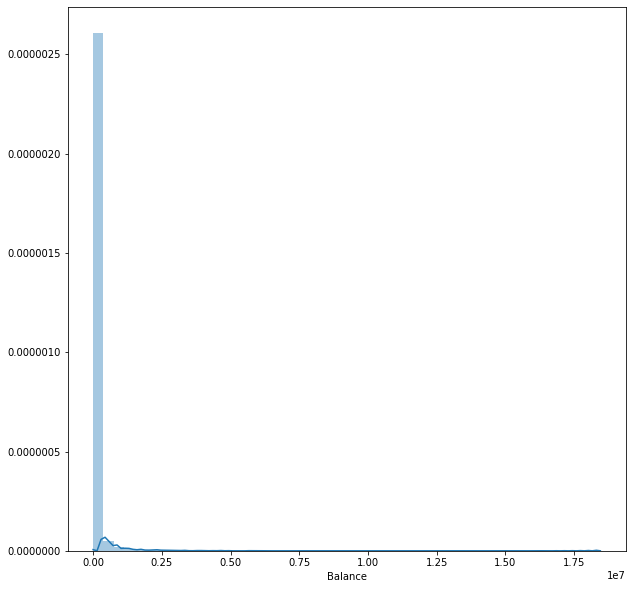

In [8]:
plt.subplots(figsize=(10,10))
sns.distplot(df['Balance'].dropna())

Text(0, 0.5, 'Count')

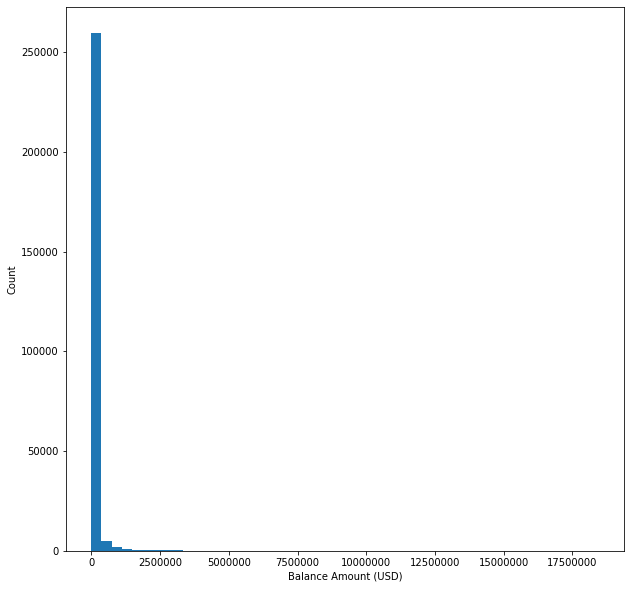

In [9]:
plt.subplots(figsize=(10,10))
plt.hist(df['Balance'].dropna(), bins=50)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))
plt.xlabel('Balance Amount (USD)')
plt.ylabel('Count')

# Distribution of Credit Risk Code w/o NAN's

Credit Risk Code
1.0       8035
2.0        432
3.0     140463
4.0      67042
4.5        102
5.0      11568
6.0       3090
6.5        186
7.0      13565
8.0       5562
9.0       4766
10.0      9886
dtype: int64


([<matplotlib.axis.XTick at 0x1e7d7fb4390>,
 <a list of 12 Text xticklabel objects>)

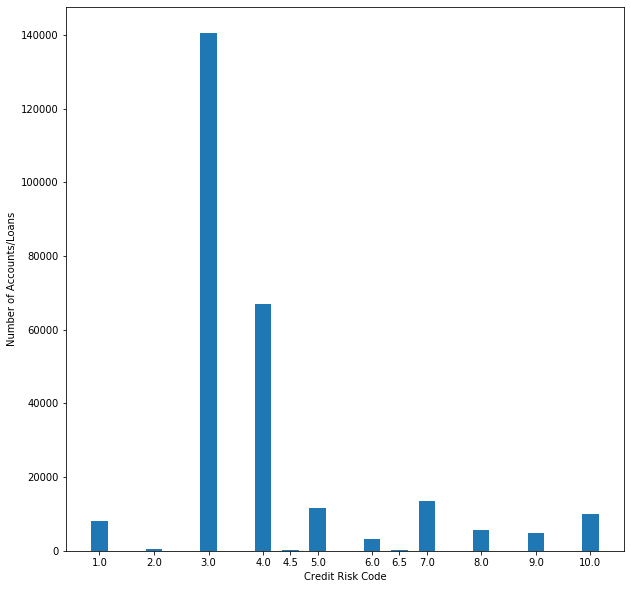

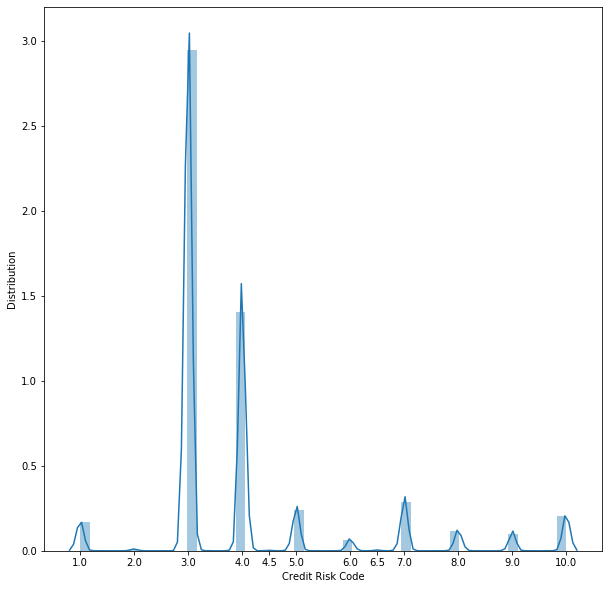

In [10]:
print(df.groupby('Credit Risk Code').size())
plt.subplots(figsize=(10,10))
plt.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Number of Accounts/Loans')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])


plt.subplots(figsize=(10,10))
sns.distplot(df['Credit Risk Code'].dropna())
plt.xlabel('Credit Risk Code')
plt.ylabel('Distribution')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Average Balance by Credit Risk Code

Credit Risk Code
1.0      12178.552106
2.0     105556.469606
3.0      47990.149479
4.0     133866.466773
4.5       6917.455294
5.0      98767.848872
6.0      96945.026265
6.5     808370.657151
7.0      37391.498430
8.0      54787.090428
9.0       4129.474310
10.0     13892.069322
Name: Balance, dtype: float64


([<matplotlib.axis.XTick at 0x1e7d8ffc0b8>,
 <a list of 12 Text xticklabel objects>)

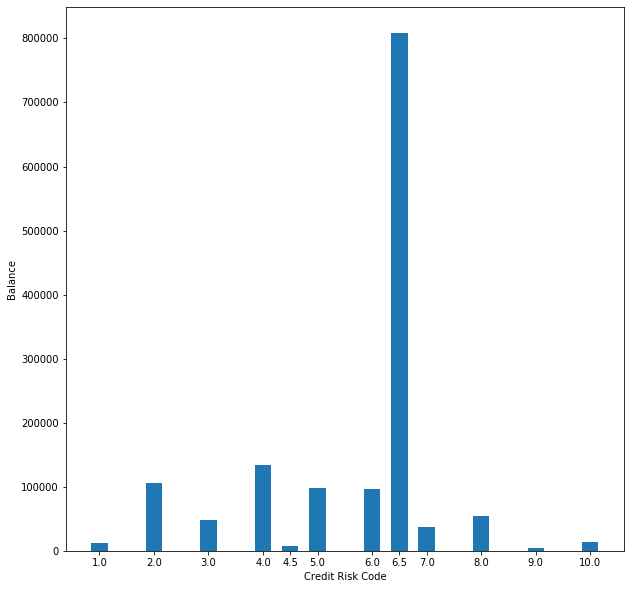

In [11]:
plt.subplots(figsize=(10,10))
print(df.groupby('Credit Risk Code')['Balance'].mean())
plt.bar(df.groupby('Credit Risk Code')['Balance'].mean().index,
        df.groupby('Credit Risk Code')['Balance'].mean().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Balance')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Balance and Credit Risk Code Weighted

Text(0.5, 0, 'Credit Risk Code')

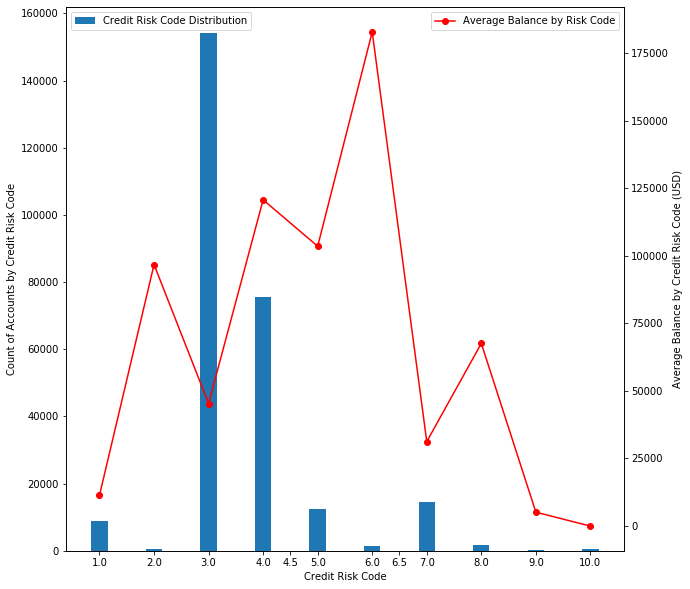

In [10]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
ax1.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
ax2.plot(df.groupby('Credit Risk Code')['Balance'].mean().index,
        df.groupby('Credit Risk Code')['Balance'].mean().values,
        'r-o')
ax1.set_ylabel('Count of Accounts by Credit Risk Code')
ax2.set_ylabel('Average Balance by Credit Risk Code (USD)')
ax1.set_xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])
ax2.legend(['Average Balance by Risk Code'])
ax1.legend(['Credit Risk Code Distribution'],loc='upper left')
ax1.set_xlabel('Credit Risk Code')

In [11]:
df.groupby('Credit Risk Code')['Balance'].agg({"Balance":'mean'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Balance
Credit Risk Code,
1.0,11380.386047
2.0,96822.919766
3.0,45353.384132
4.0,120794.008545
5.0,103594.813015
6.0,182966.020980
7.0,31256.413094
8.0,67618.963581
9.0,5127.689798


In [15]:
df1 = pd.merge(df.groupby('Credit Risk Code')['Balance'].agg({"Balance":'mean'}),
         pd.DataFrame(df.groupby('Credit Risk Code')[['Credit Risk Code','Balance']].size()),
        left_index=True,
        right_index=True)
df1.columns = ['Balance', 'Count']
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Balance,Count
Credit Risk Code,,
1.0,11380.386047,8907
2.0,96822.919766,471
3.0,45353.384132,154157
4.0,120794.008545,75530
5.0,103594.813015,12418
6.0,182966.020980,1316
7.0,31256.413094,14402
8.0,67618.963581,1860
9.0,5127.689798,247


# Days Past Due Investigation

In [15]:
df['Days Past Due'].value_counts()

0        223314
9          1272
6          1158
8          1053
3           997
4           965
5           941
7           939
1           877
2           838
15          636
16          556
14          505
13          436
25          389
26          388
10          376
11          358
24          350
12          294
21          292
23          284
20          273
29          258
28          251
19          243
17          232
22          231
30          198
27          192
          ...  
9052          1
13150         1
7259          1
9308          1
13406         1
1368          1
10464         1
5021          1
11613         1
229           1
344           1
14431         1
3486          1
5205          1
3158          1
11930         1
1439          1
13905         1
9811          1
5717          1
1623          1
4327          1
12114         1
2532          1
5973          1
1879          1
14818         1
7580          1
6235          1
3043          1
Name: Days Past Due, Len

Text(0.5, 0, 'Days Past Due Binned')

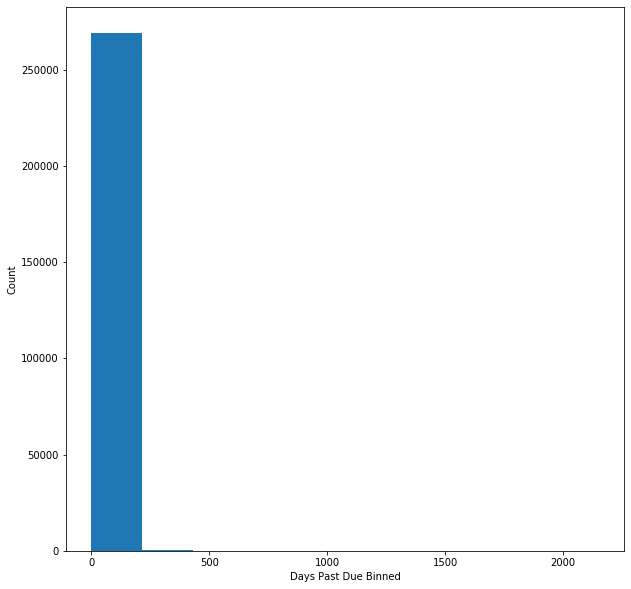

In [12]:
plt.subplots(figsize=(10,10))
plt.hist(df['Days Past Due'])
plt.ylabel('Count')
plt.xlabel('Days Past Due Binned')

## Average days past due grouped by credit risk code

Credit Risk Code
1.0         6.491475
2.0         0.402778
3.0        15.590433
4.0        14.562573
4.5      3334.509804
5.0       108.579876
6.0      2227.208414
6.5      2964.301075
7.0       148.341836
8.0      2640.167745
9.0     10863.191565
10.0     6844.972082
Name: Days Past Due, dtype: float64


([<matplotlib.axis.XTick at 0x1e7d9507a20>,
 <a list of 12 Text xticklabel objects>)

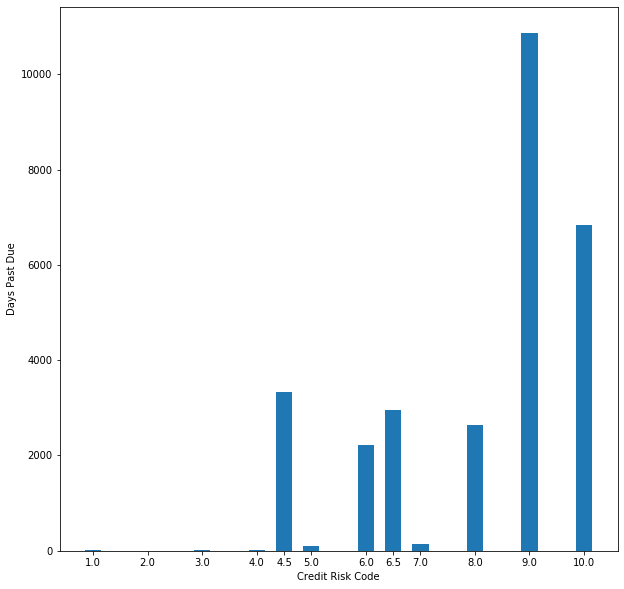

In [17]:
plt.subplots(figsize=(10,10))
print(df.groupby('Credit Risk Code')['Days Past Due'].mean())
plt.bar(df.groupby('Credit Risk Code')['Days Past Due'].mean().index,
        df.groupby('Credit Risk Code')['Days Past Due'].mean().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Days Past Due')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Days Past Due Weighted

Text(0.5, 0, 'Credit Risk Code')

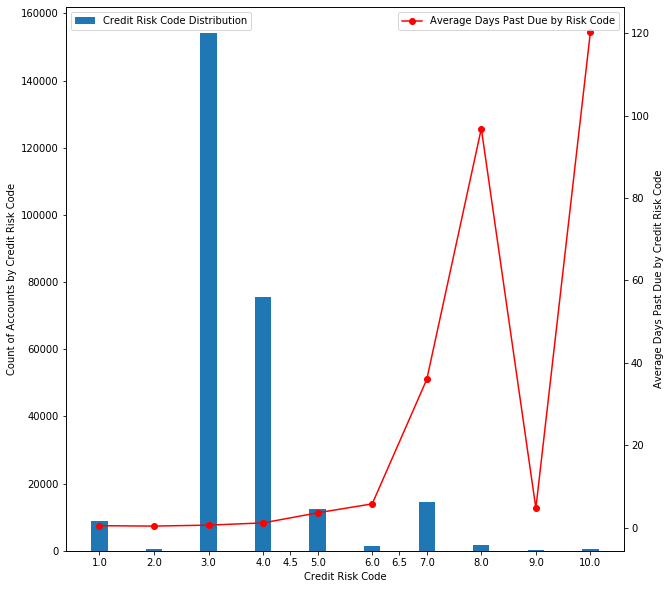

In [13]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
ax1.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
ax2.plot(df.groupby('Credit Risk Code')['Days Past Due'].mean().index,
        df.groupby('Credit Risk Code')['Days Past Due'].mean().values,
        'r-o')
ax1.set_ylabel('Count of Accounts by Credit Risk Code')
ax2.set_ylabel('Average Days Past Due by Credit Risk Code')
ax1.set_xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])
ax2.legend(['Average Days Past Due by Risk Code'])
ax1.legend(['Credit Risk Code Distribution'],loc='upper left')
ax1.set_xlabel('Credit Risk Code')

In [14]:
df1 = pd.merge(df.groupby('Credit Risk Code')['Days Past Due'].agg({"Days Past Due":'mean'}),
         pd.DataFrame(df.groupby('Credit Risk Code')[['Credit Risk Code','Days Past Due']].size()),
        left_index=True,
        right_index=True)
df1.columns = ['Days Past Due', 'Count']
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Days Past Due,Count
Credit Risk Code,,
1.0,0.462782,8907
2.0,0.369427,471
3.0,0.602100,154157
4.0,1.144896,75530
5.0,3.590594,12418
6.0,5.764438,1316
7.0,35.969935,14402
8.0,96.849462,1860
9.0,4.708502,247
